Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Interpolation vs Curve Fitting

### Interpolation
- Construct a curve that passes through all the data points
- Implicit assumption that all points are accurate and distinct

### Curve Fitting
- Find a smooth curve that approximates the data
- Applied to data that is scattered (contains noise or measurements aren't perfect)
- The curve does not necessarily hit all the data points


Given the following data points, use the monomials and Lagrange polynomials to interpolate the data

|    `x` |   0 |   1 |  -1 |   2 |  -2 |
|    --- | --- | --- | --- | --- | --- |
| `f(x)` |  -5 |  -3 | -15 |  39 |  -9 |

In [3]:
data = np.array([[ 0,  1,  -1,  2, -2],
                 [-5, -3, -15, 39, -9]], dtype=float)

# Monomial Interpolation

Define the monomial functions

$$\begin{align}
    p_{0}(x) &= 1 \nonumber \\
    p_{1}(x) &= x \nonumber \\
    p_{2}(x) &= x^{2} \nonumber \\
    &\vdots  \nonumber \\
    p_{n}(x) &= x^{n} \nonumber \\
\end{align}$$

Form the following system of equations to solve the interpolationg monomial function

$$y =

\begin{bmatrix}
    y_0 \\
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
\end{bmatrix}

=

\begin{bmatrix}
    1      & x_1    & x_1^2  & \ldots & x_1^{n}\\
    1      & x_2    & x_2^2  & \ldots & x_2^{n}\\
    1      & x_3    & x_3^2  & \ldots & x_3^{n}\\
    \vdots & \vdots & \vdots & \ddots & \vdots   \\
    1      & x_n    & x_n^2  & \ldots & x_n^{n}\\
\end{bmatrix}

\begin{bmatrix}
    c_0 \\
    c_1 \\
    c_2 \\
    \vdots \\
    c_n \\
\end{bmatrix}$$

In [4]:
def monomialPoly(data):
    n = data.shape[1]

    M = []
    for i in range(n):
        def poly(x,i=i):
            return x**i
        M.append(poly)
    return M

def interpMonomial(x,data):
    n = data.shape[1]

    M = monomialPoly(data)

    V = np.zeros([n,n])
    f = np.zeros([n,1])
    for i in range(n):
        P = []
        for j in range(n):
            P.append(M[j](data[0,i]))
        V[i,:] = P
        f[i] = data[1,i]

    c = np.linalg.solve(V,f)

    sum = 0
    for i in range(n):
        sum += c[i]*x**i
    
    return sum

Plot the interpolated curve passing through the data points

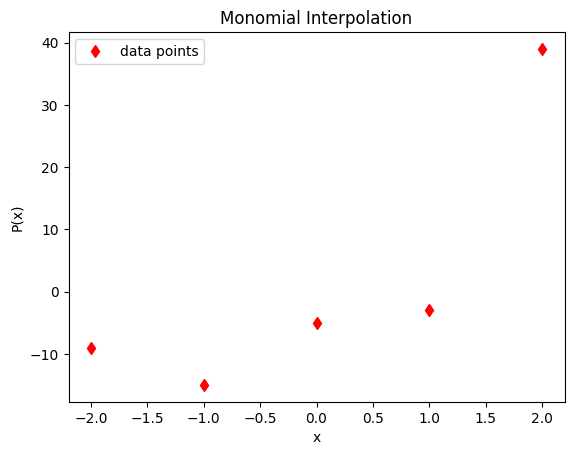

In [19]:
x = np.linspace(-2,2,100)

plt.plot(data[0,0],data[1,0],'rd',label='data points')
for i in range(1,data.shape[1]):
    plt.plot(data[0,i],data[1,i],'rd')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Monomial Interpolation')
plt.legend()
plt.show()

Plot the monomial basis

In [6]:
# M = monomialPoly(data)
# for i in range(data.shape[1]):
#     plt.plot(x,M[i](x),label=fr'$p_{i}$')
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('Monomial basis')
# plt.legend()
# plt.show()

# Lagrange Interpolation

Define the Lagrange interpolation function, $L(x)$

$$L(x) = \sum_{i=1}^{n} \ell_{i}(x)~y_{i}, ~~~~~ \ell_{i}(x) = \prod_{\substack{j=1 \\ i\neq j}}^{n} \frac{x-x_{j}}{x_{i} - x_{j}}$$

In [7]:
def lagrangePoly(data):
    n = data.shape[1]
    L = []

    for i in range(n):

        def lagrange(x,i=i):
            prod = 1
            for j in range(n):
                if j != i:
                    prod *= (x - data[0,j]) / (data[0,i] - data[0,j])
            return prod
        
        L.append(lagrange)
    
    return L

def interpLagrange(x,data):
    n = data.shape[1]
    L = lagrangePoly(data)

    sum = 0
    for i in range(n):
        sum += data[1,i] * L[i](x)

    return sum

Plot the interpolated curve passing through the data points

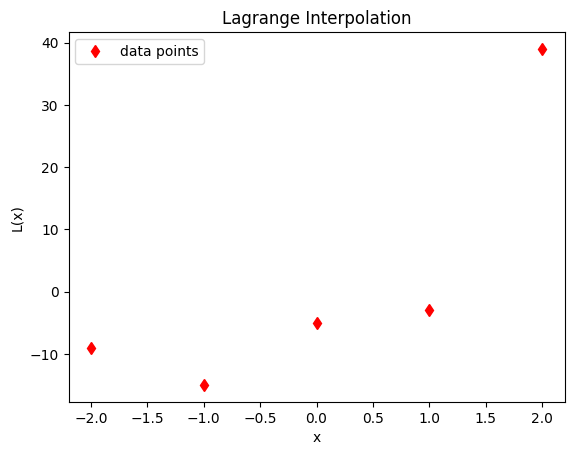

In [20]:
data = np.array([[ 0,  1,  -1,  2, -2],
                 [-5, -3, -15, 39, -9]], dtype=float)

x = np.linspace(-2,2,100)

plt.plot(data[0,0],data[1,0],'rd',label='data points')
for i in range(1,data.shape[1]):
    plt.plot(data[0,i],data[1,i],'rd')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.title('Lagrange Interpolation')
plt.legend()
plt.show()

Plot the Lagrange basis

In [9]:
# L = lagrangePoly(data)
# for i in range(data.shape[1]):
#     plt.plot(x,L[i](x),label=fr'$L_{i}$')
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('Lagrange basis')
# plt.legend()
# plt.show()

# Least-Squares Fit

Data obtained from experiments can contain a significant amount of random noise. We may wish to find a smooth curve that fits the data points on average. Ideally this curve should have a simple form (such as a low-order polynomial), so as to not reproduce the noise.

Consider the following function that will be used to fit a data set

$$\hat{Y}(x) = \hat{Y}(x;a_{1},a_{2},\ldots,a_{m}) = a_{1}f_{1}(x) + a_{2}f_{2}(x) + \ldots + a_{m}f_{m}(x)$$

where $a_{0}, a_{1}, \ldots, a_{m}$ are variable paramters. The data set consists of the points

$$(x_{1},y_{1}),~(x_{2},y_{2}),\ldots(x_{n},y_{n})$$

where $m < n$. The form of $F(x)$ is determined beforehand, ususally from the theory associated with the experiment from which the data was obtained. Therefore, the only means of adjusting the fit are the parameters themselves. The estimation of the data at each data point $x_{i}$ for is shown as

$$\begin{align}
    \hat{y}(x_{1}) &= a_{1}f_{1}(x_{1}) + a_{2}f_{2}(x_{1}) + \ldots + a_{m}f_{m}(x_{1}) \nonumber \\
    \hat{y}(x_{2}) &= a_{1}f_{1}(x_{2}) + a_{2}f_{2}(x_{2}) + \ldots + a_{m}f_{m}(x_{2}) \nonumber \\
    &\vdots \nonumber \\
    \hat{y}(x_{n}) &= a_{1}f_{1}(x_{n}) + a_{2}f_{2}(x_{n}) + \ldots + a_{m}f_{m}(x_{n}) \nonumber \\
\end{align}$$

In other words,


$$y \approx \hat{y} = Ax ~~~\implies~~~

\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}

\approx

\begin{bmatrix}
    \hat{y}_1 \\
    \hat{y}_2 \\
    \vdots \\
    \hat{y}_n
\end{bmatrix}

=

\begin{bmatrix}
    f_{1}(x_{1}) & f_{2}(x_{1}) & \ldots & f_{m}(x_{1})\\
    f_{1}(x_{2}) & f_{2}(x_{2}) & \ldots & f_{m}(x_{2})\\
    \vdots       &      \vdots  & \ddots &       \vdots\\
    f_{1}(x_{n}) & f_{2}(x_{n}) & \ldots & f_{m}(x_{n})\\
\end{bmatrix}

\begin{bmatrix}
    a_{1} \\
    a_{2} \\
    \vdots \\
    a_{m} \\
\end{bmatrix}$$

The least-squares prolem seeks accomplish the following optimization problem

$$min \sum_{i=1}^{n}\left(y_{i} - \hat{y}_{i}\right)^{2}$$

The solution to this least-squares problem is

$$\boxed{x = \left(A^{T}A\right)^{-1}A^{T}y}$$

# Linear Regression

Consider $F$ as a family of polynomial functions. 

$$F = 

\begin{bmatrix}
    1      & x_{1}   & \ldots & x_{1}^{m-1}\\
    1      & x_{2}   & \ldots & x_{2}^{m-1}\\
    \vdots & \vdots  & \ddots &    \vdots\\
    1      & x_{n}   & \ldots & x_{n}^{m-1}\\
\end{bmatrix}$$

Linear regression is the simplest example of curve fitting with polynomial functions. In this case, we only consider the first two columns of the above matrix to get a system of equations of the form

$$\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}

=

\begin{bmatrix}
    1      & x_{1} \\
    1      & x_{2} \\
    \vdots & \vdots  \\
    1      & x_{n} \\
\end{bmatrix}

\begin{bmatrix}
    a_{1} \\
    a_{2} \\
\end{bmatrix}$$

Try an example

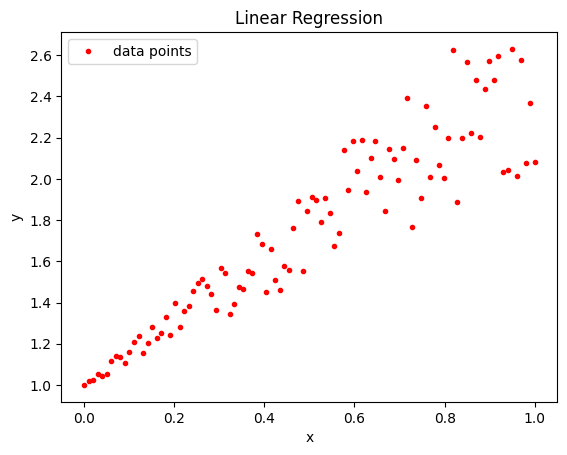

In [18]:
# generate x and y data
x = np.linspace(0,1,100)
y = 1 + x + x*np.random.random(len(x))


# plot
plt.plot(x,y,'r.',label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Practice Problem

Consider the following data set

<!-- |    `x` |   5 |  -2 |  -3 |   6 |   8 |  -5 |   2 |   3 |   0 |  -8 |
|    --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| `f(x)` |   1 |  -2 |  -5 |  -3 |   9 |   7 |  -7 |   6 |  10 |  -9 | -->

|    `x` |   5 |  -2 |  -7 |   6 |
|    --- | --- | --- | --- | --- |
| `f(x)` |   1 |  -2 |  -5 |  -3 |

**Do the following problems**

  **a)** Interpolate the data points using Lagrange interpoolation

  **b)** Fit a quadratic curve to this data set